In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive"

 004-2AQL.pdf
 CiC-DataSet
'Colab Notebooks'
'Compare and contrast SIDS, AIDS and HIDS based on....gsheet'
'CompTIA+Network++(N10-008)+(Study+Notes).pdf'
'In a table, mention method, CVE number, severity....gsheet'
'Include a summary table of the main devices makin....gsheet'
'Include a table summarising the main characterist....gsheet'
 Project
'provide information about sandboxes and also give....gsheet'
'Shreyas Srinivasa - MSc CyberSecurity - Available Sept 2024.pdf'
'Shreyas Srinivasa - MSc CyberSecurity.pdf'


In [ ]:
!ls "/content/drive/MyDrive/CiC-DataSet"
!ls "/content/drive/MyDrive/CiC-DataSet/Complete_Dataset"
!ls "/content/drive/MyDrive/CiC-DataSet/Complete_Dataset/csv"


Complete_Dataset  merged_filtered.csv
 csv   example	'README - README.pdf'   supplementary
 CICIoT2023  'README_csv - README.pdf'


In [ ]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler, StandardScaler

drive.mount('/content/drive', force_remount=True)


DATASET_DIRECTORY = '/content/drive/MyDrive/CiC-DataSet/Complete_Dataset/csv/CICIoT2023'

try:
    df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
    if not df_sets:
        print("No CSV files found in the specified directory.")
    df_sets.sort()
except Exception as e:
    print(f"Error accessing directory: {e}")

training_sets = df_sets[:int(len(df_sets) * 0.8)]
test_sets = df_sets[int(len(df_sets) * 0.8):]

X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
    'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
    'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
    'ece_flag_number', 'cwr_flag_number', 'ack_count',
    'syn_count', 'fin_count', 'urg_count', 'rst_count',
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
    'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
    'Radius', 'Covariance', 'Variance', 'Weight',
]
y_column = 'label'



for train_set in tqdm(training_sets, desc="Processing Training Sets"):
    file_path = os.path.join(DATASET_DIRECTORY, train_set)
    try:
        for chunk in pd.read_csv(file_path, usecols=X_columns, chunksize=5000):
            scaler.partial_fit(chunk)
    except Exception as e:
        print(f"Error processing file {train_set}: {e}")


Mounted at /content/drive


Processing Training Sets: 100%|██████████| 135/135 [04:22<00:00,  1.94s/it]


### Classification: 34 (33+1) classes

In [ ]:
import os
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression

ML_models = [
    LogisticRegression(n_jobs=-1),
]

ML_names = [
    "LogisticRegression",
]

for train_set in tqdm(training_sets):

    file_path = os.path.join(DATASET_DIRECTORY, train_set)
    d = pd.read_csv(file_path)


    d[X_columns] = scaler.transform(d[X_columns])

    for model in ML_models:
        model.fit(d[X_columns], d[y_column])

    del d


100%|██████████| 135/135 [1:33:48<00:00, 41.69s/it]


In [ ]:
import os
from tqdm import tqdm
import pandas as pd
from sklearn.linear_model import LogisticRegression

ML_models = [
    LogisticRegression(n_jobs=-1),
]

ML_names = [
    "LogisticRegression",
]

for train_set in tqdm(training_sets):
    file_path = os.path.join(DATASET_DIRECTORY, train_set)
    d_train = pd.read_csv(file_path)

    d_train[X_columns] = scaler.transform(d_train[X_columns])

    for model in ML_models:
        model.fit(d_train[X_columns], d_train[y_column])

    del d_train

y_test = []
preds = {i: [] for i in range(len(ML_models))}

for test_set in tqdm(test_sets):
    file_path = os.path.join(DATASET_DIRECTORY, test_set)
    d_test = pd.read_csv(file_path)


    d_test[X_columns] = scaler.transform(d_test[X_columns])

    y_test += list(d_test[y_column].values)

    for i, model in enumerate(ML_models):
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i].extend(y_pred)


100%|██████████| 34/34 [01:32<00:00,  2.72s/it]


In [ ]:
import os
from tqdm import tqdm
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


ML_models = [
    LogisticRegression(n_jobs=-1),
]

ML_names = [
    "LogisticRegression",
]


for train_set in tqdm(training_sets):
    file_path = os.path.join(DATASET_DIRECTORY, train_set)
    d_train = pd.read_csv(file_path)


    d_train[X_columns] = scaler.transform(d_train[X_columns])

    for model in ML_models:
        model.fit(d_train[X_columns], d_train[y_column])

    del d_train

y_test = []
preds = {i: [] for i in range(len(ML_models))}

for test_set in tqdm(test_sets):
    file_path = os.path.join(DATASET_DIRECTORY, test_set)
    d_test = pd.read_csv(file_path)

    d_test[X_columns] = scaler.transform(d_test[X_columns])

    y_test += list(d_test[y_column].values)

    for i, model in enumerate(ML_models):
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i].extend(y_pred)

# Evaluation phase
for k, v in preds.items():
    y_pred = v
    print(f"##### {ML_names[k]} #####")
    print('Accuracy Score: ', accuracy_score(y_test, y_pred))
    print('Recall Score: ', recall_score(y_test, y_pred, average='macro'))
    print('Precision Score: ', precision_score(y_test, y_pred, average='macro'))
    print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))
    print("\n")


100%|██████████| 34/34 [01:33<00:00,  2.75s/it]


##### LogisticRegression #####
Accuracy Score:  0.8018318090018134
Recall Score:  0.485280915659017
Precision Score:  0.5949782762031056
F1 Score:  0.4912848311505882




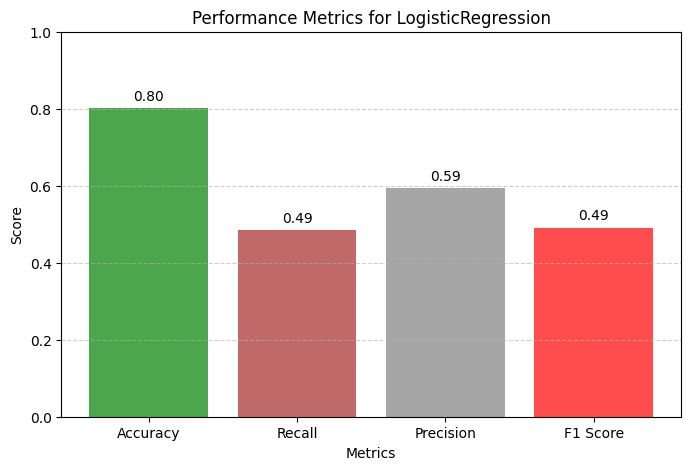

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


def plot_metrics(metrics, values, model_name):
    """
    Function to plot performance metrics.
    """
    colors = ['green', 'brown', 'grey', 'red']

    plt.figure(figsize=(8, 5))
    plt.bar(metrics, values, color=colors, alpha=0.7)
    plt.ylim(0, 1)  # Metrics range from 0 to 1
    plt.title(f"Performance Metrics for {model_name}")
    plt.ylabel("Score")
    plt.xlabel("Metrics")

    for i, value in enumerate(values):
        plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

for k, v in preds.items():
    y_pred = v

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='macro')
    prec = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
    values = [acc, rec, prec, f1]

    plot_metrics(metrics, values, ML_names[k])

# Classification: 8 (7+1) classes

In [ ]:
dict_7classes = {}
dict_7classes['DDoS-RSTFINFlood'] = 'DDoS'
dict_7classes['DDoS-PSHACK_Flood'] = 'DDoS'
dict_7classes['DDoS-SYN_Flood'] = 'DDoS'
dict_7classes['DDoS-UDP_Flood'] = 'DDoS'
dict_7classes['DDoS-TCP_Flood'] = 'DDoS'
dict_7classes['DDoS-ICMP_Flood'] = 'DDoS'
dict_7classes['DDoS-SynonymousIP_Flood'] = 'DDoS'
dict_7classes['DDoS-ACK_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-UDP_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-ICMP_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-SlowLoris'] = 'DDoS'
dict_7classes['DDoS-HTTP_Flood'] = 'DDoS'

dict_7classes['DoS-UDP_Flood'] = 'DoS'
dict_7classes['DoS-SYN_Flood'] = 'DoS'
dict_7classes['DoS-TCP_Flood'] = 'DoS'
dict_7classes['DoS-HTTP_Flood'] = 'DoS'


dict_7classes['Mirai-greeth_flood'] = 'Mirai'
dict_7classes['Mirai-greip_flood'] = 'Mirai'
dict_7classes['Mirai-udpplain'] = 'Mirai'

dict_7classes['Recon-PingSweep'] = 'Recon'
dict_7classes['Recon-OSScan'] = 'Recon'
dict_7classes['Recon-PortScan'] = 'Recon'
dict_7classes['VulnerabilityScan'] = 'Recon'
dict_7classes['Recon-HostDiscovery'] = 'Recon'

dict_7classes['DNS_Spoofing'] = 'Spoofing'
dict_7classes['MITM-ArpSpoofing'] = 'Spoofing'

dict_7classes['BenignTraffic'] = 'Benign'

dict_7classes['BrowserHijacking'] = 'Web'
dict_7classes['Backdoor_Malware'] = 'Web'
dict_7classes['XSS'] = 'Web'
dict_7classes['Uploading_Attack'] = 'Web'
dict_7classes['SqlInjection'] = 'Web'
dict_7classes['CommandInjection'] = 'Web'


dict_7classes['DictionaryBruteForce'] = 'BruteForce'

In [ ]:
for train_set in tqdm(training_sets):
    file_path = os.path.join(DATASET_DIRECTORY, train_set)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue

    try:
        d = pd.read_csv(file_path)
        d[X_columns] = scaler.transform(d[X_columns])
        new_y = [dict_7classes[k] for k in d[y_column]]
        d[y_column] = new_y

        for model in ML_models:
            model.fit(d[X_columns], d[y_column])
        del d
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

100%|██████████| 135/135 [34:08<00:00, 15.18s/it]


In [ ]:
y_test = []
preds = {i: [] for i in range(len(ML_models))}

for test_set in tqdm(test_sets):

    file_path = os.path.join(DATASET_DIRECTORY, test_set)

    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        continue

    try:
        d_test = pd.read_csv(file_path)
        d_test[X_columns] = scaler.transform(d_test[X_columns])
        new_y = [dict_7classes[k] for k in d_test[y_column]]
        d_test[y_column] = new_y

        y_test += list(d_test[y_column].values)

        for i, model in enumerate(ML_models):
            y_pred = list(model.predict(d_test[X_columns]))
            preds[i].extend(y_pred)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")


100%|██████████| 34/34 [01:32<00:00,  2.71s/it]


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_names[k]} (8 classes) #####")
    print('Accuracy Score = ', accuracy_score(y_pred, y_test))
    print('Recall Score = ', recall_score(y_pred, y_test, average='macro'))
    print('Precision Score = ', precision_score(y_pred, y_test, average='macro'))
    print('F1 Score = ', f1_score(y_pred, y_test, average='macro'))
    print()
    print()
    print()

##### LogisticRegression (8 classes) #####
Accuracy Score =  0.8314706124982
Recall Score =  0.6831711618042706
Precision Score =  0.5108819896711103
F1 Score =  0.537237291622334





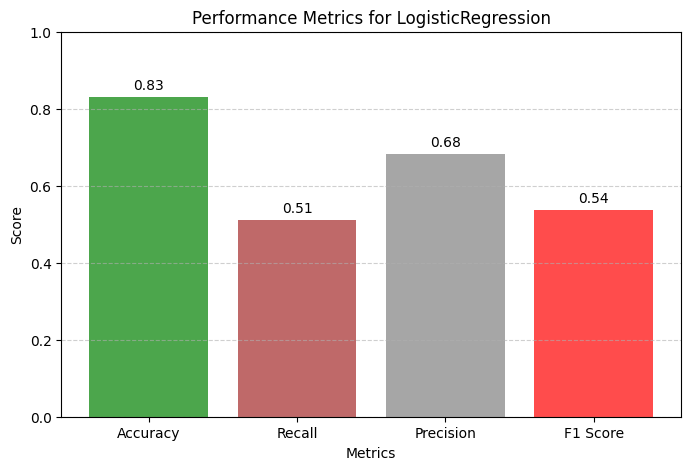

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def plot_metrics(metrics, values, model_name):
    """
    Function to plot performance metrics.
    """
    colors = ['green', 'brown', 'grey', 'red']

    plt.figure(figsize=(8, 5))
    plt.bar(metrics, values, color=colors, alpha=0.7)
    plt.ylim(0, 1)
    plt.title(f"Performance Metrics for {model_name}")
    plt.ylabel("Score")
    plt.xlabel("Metrics")

    for i, value in enumerate(values):
        plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

for k, v in preds.items():
    y_pred = v

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='macro')
    prec = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
    values = [acc, rec, prec, f1]

    plot_metrics(metrics, values, ML_names[k])

# Classification: 2 (1+1) Classes


In [ ]:
dict_2classes = {}
dict_2classes['DDoS-RSTFINFlood'] = 'Attack'
dict_2classes['DDoS-PSHACK_Flood'] = 'Attack'
dict_2classes['DDoS-SYN_Flood'] = 'Attack'
dict_2classes['DDoS-UDP_Flood'] = 'Attack'
dict_2classes['DDoS-TCP_Flood'] = 'Attack'
dict_2classes['DDoS-ICMP_Flood'] = 'Attack'
dict_2classes['DDoS-SynonymousIP_Flood'] = 'Attack'
dict_2classes['DDoS-ACK_Fragmentation'] = 'Attack'
dict_2classes['DDoS-UDP_Fragmentation'] = 'Attack'
dict_2classes['DDoS-ICMP_Fragmentation'] = 'Attack'
dict_2classes['DDoS-SlowLoris'] = 'Attack'
dict_2classes['DDoS-HTTP_Flood'] = 'Attack'

dict_2classes['DoS-UDP_Flood'] = 'Attack'
dict_2classes['DoS-SYN_Flood'] = 'Attack'
dict_2classes['DoS-TCP_Flood'] = 'Attack'
dict_2classes['DoS-HTTP_Flood'] = 'Attack'


dict_2classes['Mirai-greeth_flood'] = 'Attack'
dict_2classes['Mirai-greip_flood'] = 'Attack'
dict_2classes['Mirai-udpplain'] = 'Attack'

dict_2classes['Recon-PingSweep'] = 'Attack'
dict_2classes['Recon-OSScan'] = 'Attack'
dict_2classes['Recon-PortScan'] = 'Attack'
dict_2classes['VulnerabilityScan'] = 'Attack'
dict_2classes['Recon-HostDiscovery'] = 'Attack'

dict_2classes['DNS_Spoofing'] = 'Attack'
dict_2classes['MITM-ArpSpoofing'] = 'Attack'

dict_2classes['BenignTraffic'] = 'Benign'

dict_2classes['BrowserHijacking'] = 'Attack'
dict_2classes['Backdoor_Malware'] = 'Attack'
dict_2classes['XSS'] = 'Attack'
dict_2classes['Uploading_Attack'] = 'Attack'
dict_2classes['SqlInjection'] = 'Attack'
dict_2classes['CommandInjection'] = 'Attack'

dict_2classes['DictionaryBruteForce'] = 'Attack'

In [ ]:
import os
from tqdm import tqdm
import pandas as pd
from sklearn.linear_model import LogisticRegression

ML_models = [
    LogisticRegression(n_jobs=-1),
]

ML_names = [
    "LogisticRegression",
]

for train_set in tqdm(training_sets):

    file_path = os.path.join(DATASET_DIRECTORY, train_set)
    d = pd.read_csv(file_path)

    d[X_columns] = scaler.transform(d[X_columns])


    new_y = [dict_2classes[k] for k in d[y_column]]
    d[y_column] = new_y


    for model in ML_models:
        model.fit(d[X_columns], d[y_column])


    del d


100%|██████████| 135/135 [15:28<00:00,  6.87s/it]


In [ ]:
import os
from tqdm import tqdm

y_test = []
preds = {i: [] for i in range(len(ML_models))}

for test_set in tqdm(test_sets):

    file_path = os.path.join(DATASET_DIRECTORY, test_set)
    d_test = pd.read_csv(file_path)

    d_test[X_columns] = scaler.transform(d_test[X_columns])
    new_y = [dict_2classes[k] for k in d_test[y_column]]
    d_test[y_column] = new_y

    y_test += list(d_test[y_column].values)

    for i, model in enumerate(ML_models):
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i].extend(y_pred)


100%|██████████| 34/34 [02:09<00:00,  3.81s/it]


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_names[k]} (2 classes) #####")
    print('Accuracy Score: ', accuracy_score(y_pred, y_test))
    print('Recall Score: ', recall_score(y_pred, y_test, average='macro'))
    print('Precision Score: ', precision_score(y_pred, y_test, average='macro'))
    print('F1 Score: ', f1_score(y_pred, y_test, average='macro'))
    print()
    print()
    print()

##### LogisticRegression (2 classes) #####
Accuracy Score:  0.9890278304177276
Recall Score:  0.890443912103491
Precision Score:  0.8632265127120491
F1 Score:  0.8763159471404506





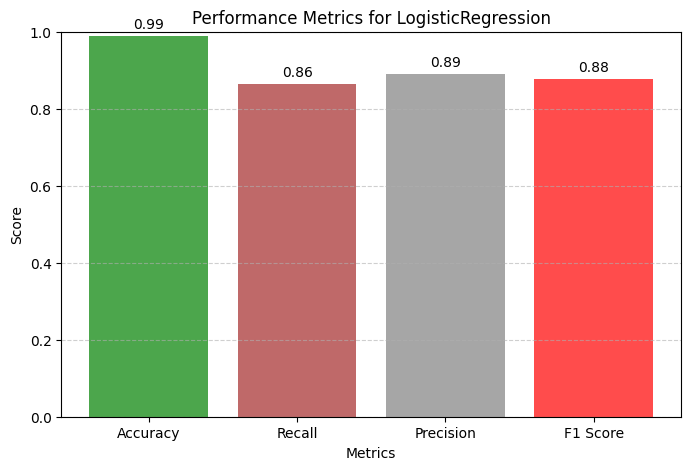

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


def plot_metrics(metrics, values, model_name):
    """
    Function to plot performance metrics.
    """
    colors = ['green', 'brown', 'grey', 'red']

    plt.figure(figsize=(8, 5))
    plt.bar(metrics, values, color=colors, alpha=0.7)
    plt.ylim(0, 1)
    plt.title(f"Performance Metrics for {model_name}")
    plt.ylabel("Score")
    plt.xlabel("Metrics")

    for i, value in enumerate(values):
        plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()


for k, v in preds.items():
    y_pred = v


    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, average='macro')
    prec = precision_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')


    metrics = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
    values = [acc, rec, prec, f1]

    plot_metrics(metrics, values, ML_names[k])
